In [1]:
# Import panda, numpy, matplotlib.pyplot, and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

In [2]:
df = pd.read_csv('C:/Users/Acer/Downloads/math for machine learning/social_media_interactions_contaminated.csv')

In [5]:
# Check for initial duplicate rows

In [3]:
initial_duplicate_count = df.duplicated().sum()
print(f'Initial duplicate count: {initial_duplicate_count}')

Initial duplicate count: 180


In [7]:
# Remove duplicate rows

In [4]:
df_cleaned = df.drop_duplicates()

In [9]:
# Verify duplicate count after dropping

In [5]:
duplicate_count_after_dropping = df_cleaned.duplicated().sum()
print(f'Duplicate count after dropping: {duplicate_count_after_dropping}')

Duplicate count after dropping: 0


In [11]:
# Count null values in each column

In [6]:
null_counts_initial= df_cleaned.isnull().sum()
print('Null values in each column:')
print(null_counts_initial)

Null values in each column:
CustomerID           0
InteractionID        0
InteractionDate      0
Platform           291
InteractionType      0
Sentiment          309
dtype: int64


In [10]:
# Replace nulls with NaN in all columns

In [11]:
df_cleaned = df_cleaned.fillna(np.nan)

In [ ]:
# Check current data types of the DataFrame

In [12]:
print('Current data types:')
print(df_cleaned.dtypes)

Current data types:
CustomerID         object
InteractionID      object
InteractionDate    object
Platform           object
InteractionType    object
Sentiment          object
dtype: object


In [ ]:
# Convert data types

In [13]:
df_cleaned['InteractionDate'] = pd.to_datetime(df_cleaned['InteractionDate'], errors='coerce')
df_cleaned['Platform'] = df_cleaned['Platform'].astype('category')
df_cleaned['InteractionType'] = df_cleaned['InteractionType'].astype('category')
df_cleaned['Sentiment'] = df_cleaned['Sentiment'].astype('category')

In [ ]:
# Verify data types after conversion

In [14]:
print('\nUpdated data types after conversion:')
print(df_cleaned.dtypes)


Updated data types after conversion:
CustomerID                 object
InteractionID              object
InteractionDate    datetime64[ns]
Platform                 category
InteractionType          category
Sentiment                category
dtype: object


In [ ]:
#Frequency Counts

In [19]:
platform_counts = df_cleaned['Platform'].value_counts()
interaction_type_counts = df_cleaned['InteractionType'].value_counts()
sentiment_counts = df_cleaned['Sentiment'].value_counts()


print("Frequency Counts for Platform:")
print(platform_counts)

print("\nFrequency Counts for Interaction Type:")
print(interaction_type_counts)

print("\nFrequency Counts for Sentiment:")
print(sentiment_counts)


Frequency Counts for Platform:
Platform
Instagram    921
Twitter      917
Facebook     891
Name: count, dtype: int64

Frequency Counts for Interaction Type:
InteractionType
Comment    1018
Share      1007
Like        995
Name: count, dtype: int64

Frequency Counts for Sentiment:
Sentiment
Positive         905
Neutral          874
Negative         866
Very Negative     34
Very Positive     32
Name: count, dtype: int64


In [ ]:
# Plotting Interactions by Platform & Sentiment

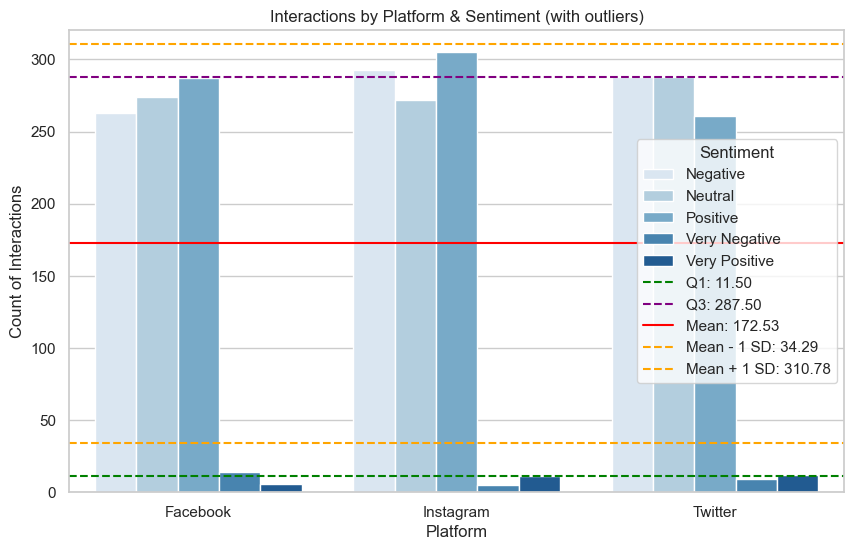

In [70]:
# Create a count of interactions by Platform and Sentiment
count_data = df.groupby(['Platform', 'Sentiment']).size().reset_index(name='Count')

# Calculate statistical metrics for Count
mean_count = count_data['Count'].mean()
std_dev_count = count_data['Count'].std()
Q1_count = count_data['Count'].quantile(0.25)
Q3_count = count_data['Count'].quantile(0.75)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.barplot(data=count_data, x='Platform', y='Count', hue='Sentiment', palette='Blues')

# Add vertical lines for mean, Q1, Q3, and standard deviations
plt.axhline(Q1_count, color='green', linestyle='--', label=f'Q1: {Q1_count:.2f}')
plt.axhline(Q3_count, color='purple', linestyle='--', label=f'Q3: {Q3_count:.2f}')
plt.axhline(mean_count, color='red', linestyle='-', label=f'Mean: {mean_count:.2f}')
plt.axhline(mean_count - std_dev_count, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_count - std_dev_count:.2f}')
plt.axhline(mean_count + std_dev_count, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_count + std_dev_count:.2f}')

# Add titles and labels
plt.title('Interactions by Platform & Sentiment (with outliers)')
plt.xlabel('Platform')
plt.ylabel('Count of Interactions')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Plotting Interactions by Platform & Sentiment (without outliers)

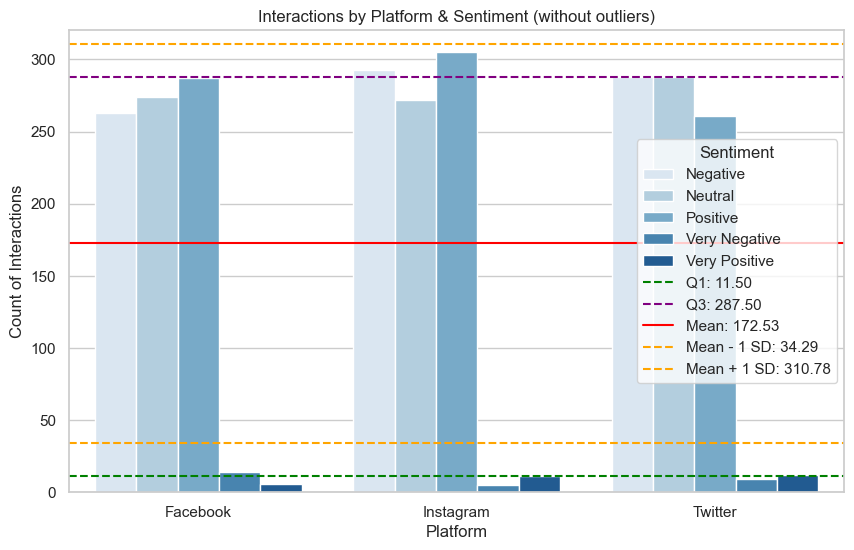

In [72]:
# Remove rows where 'Platform' or 'Sentiment' contains null values
df_filtered = df.dropna(subset=['Platform', 'Sentiment'])

# Create a count of interactions by Platform and Sentiment (excluding null values)
count_data_filtered = df_filtered.groupby(['Platform', 'Sentiment']).size().reset_index(name='Count')

# Calculate statistical metrics for Count
mean_count = count_data_filtered['Count'].mean()
std_dev_count = count_data_filtered['Count'].std()
Q1_count = count_data_filtered['Count'].quantile(0.25)
Q3_count = count_data_filtered['Count'].quantile(0.75)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot excluding null values
sns.barplot(data=count_data_filtered, x='Platform', y='Count', hue='Sentiment', palette='Blues')

# Add vertical lines for mean, Q1, Q3, and standard deviations
plt.axhline(Q1_count, color='green', linestyle='--', label=f'Q1: {Q1_count:.2f}')
plt.axhline(Q3_count, color='purple', linestyle='--', label=f'Q3: {Q3_count:.2f}')
plt.axhline(mean_count, color='red', linestyle='-', label=f'Mean: {mean_count:.2f}')
plt.axhline(mean_count - std_dev_count, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_count - std_dev_count:.2f}')
plt.axhline(mean_count + std_dev_count, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_count + std_dev_count:.2f}')

# Add titles and labels
plt.title('Interactions by Platform & Sentiment (without outliers)')
plt.xlabel('Platform')
plt.ylabel('Count of Interactions')
plt.legend(title='Sentiment')

# Show the plot
plt.show()


In [ ]:
# Plotting BOTH side by side

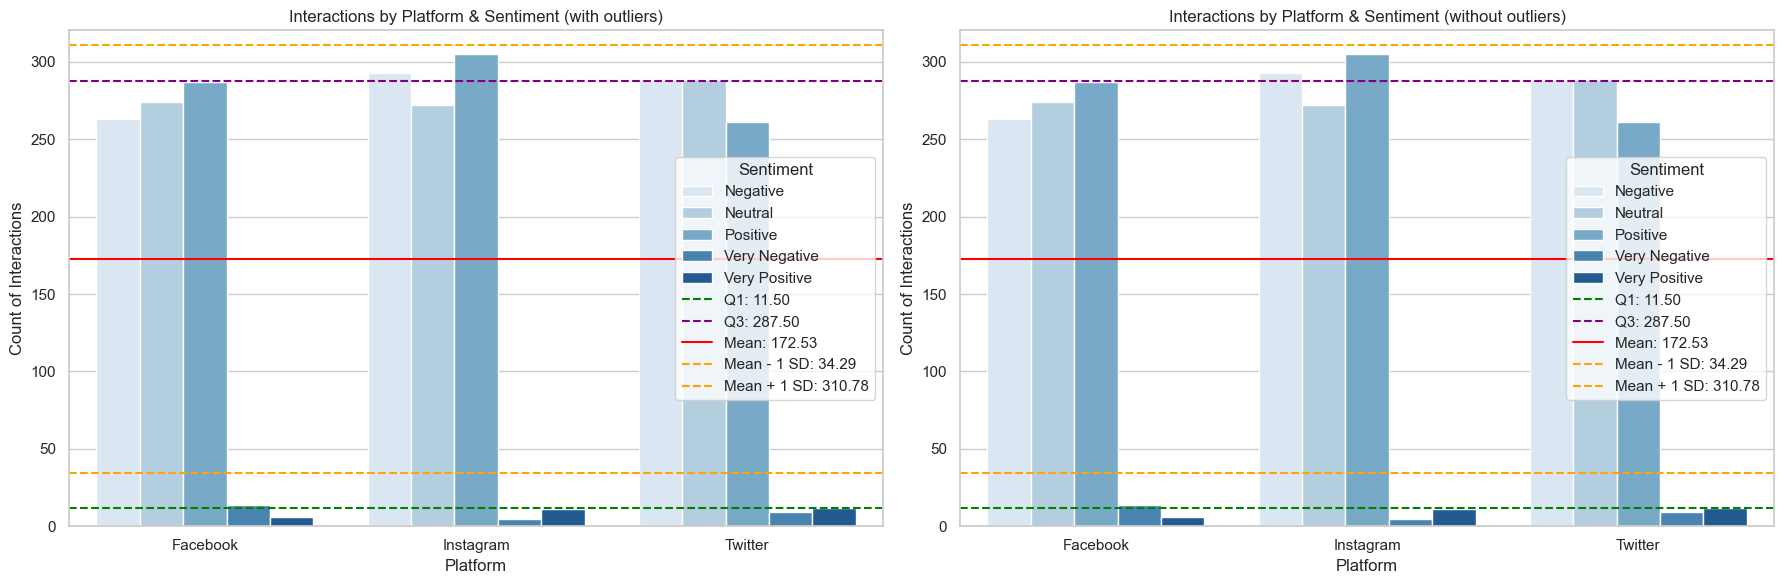

In [73]:
count_data = df.groupby(['Platform', 'Sentiment']).size().reset_index(name='Count')

# Create a count of interactions by Platform and Sentiment excluding null values
df_filtered = df.dropna(subset=['Platform', 'Sentiment'])
count_data_filtered = df_filtered.groupby(['Platform', 'Sentiment']).size().reset_index(name='Count')

# Calculate statistical metrics for both datasets
mean_count = count_data['Count'].mean()
std_dev_count = count_data['Count'].std()
Q1_count = count_data['Count'].quantile(0.25)
Q3_count = count_data['Count'].quantile(0.75)

mean_count_filtered = count_data_filtered['Count'].mean()
std_dev_count_filtered = count_data_filtered['Count'].std()
Q1_count_filtered = count_data_filtered['Count'].quantile(0.25)
Q3_count_filtered = count_data_filtered['Count'].quantile(0.75)

# Set the figure size for side-by-side plots
plt.figure(figsize=(18, 6))

# Plot with outliers
plt.subplot(1, 2, 1)
sns.barplot(data=count_data, x='Platform', y='Count', hue='Sentiment', palette='Blues')
plt.axhline(Q1_count, color='green', linestyle='--', label=f'Q1: {Q1_count:.2f}')
plt.axhline(Q3_count, color='purple', linestyle='--', label=f'Q3: {Q3_count:.2f}')
plt.axhline(mean_count, color='red', linestyle='-', label=f'Mean: {mean_count:.2f}')
plt.axhline(mean_count - std_dev_count, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_count - std_dev_count:.2f}')
plt.axhline(mean_count + std_dev_count, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_count + std_dev_count:.2f}')
plt.title('Interactions by Platform & Sentiment (with outliers)')
plt.xlabel('Platform')
plt.ylabel('Count of Interactions')
plt.legend(title='Sentiment')

# Plot without outliers (filtered)
plt.subplot(1, 2, 2)
sns.barplot(data=count_data_filtered, x='Platform', y='Count', hue='Sentiment', palette='Blues')
plt.axhline(Q1_count_filtered, color='green', linestyle='--', label=f'Q1: {Q1_count_filtered:.2f}')
plt.axhline(Q3_count_filtered, color='purple', linestyle='--', label=f'Q3: {Q3_count_filtered:.2f}')
plt.axhline(mean_count_filtered, color='red', linestyle='-', label=f'Mean: {mean_count_filtered:.2f}')
plt.axhline(mean_count_filtered - std_dev_count_filtered, color='orange', linestyle='--', label=f'Mean - 1 SD: {mean_count_filtered - std_dev_count_filtered:.2f}')
plt.axhline(mean_count_filtered + std_dev_count_filtered, color='orange', linestyle='--', label=f'Mean + 1 SD: {mean_count_filtered + std_dev_count_filtered:.2f}')
plt.title('Interactions by Platform & Sentiment (without outliers)')
plt.xlabel('Platform')
plt.ylabel('Count of Interactions')
plt.legend(title='Sentiment')

# Show both plots
plt.tight_layout()
plt.show()


In [ ]:
# Save the cleaned DataFrame to a new CSV file

In [74]:
count_data_without_outliers.to_csv('M1social_media_interactions.csv', index=False)